# Project: Work on Your Data Story
How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story

1. Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

1. Get going by asking the following questions and looking for the answers with some code and plots:

    1. Can you count something interesting?

    1. Can you find some trends (high, low, increase, decrease, anomalies)?

    1. Can you make a bar plot or a histogram?

    1. Can you compare two related quantities?

    1. Can you make a scatterplot?

    1. Can you make a time-series plot?

1. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

1. By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?


**Submission Requirements:** Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:

1. The questions you asked
1. The trends you investigated
1. The resulting visualizations and conclusions.

In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook.

# Load data

We'll load the dataframes generated from the notebook `0. Load and clean data.ipynb`.

In [1]:
import numpy as np
import pandas as pd

In [2]:
monster_df = pd.read_pickle('data/monster_df')

In [3]:
# Load tidied dataframes

# spells_df = pd.read_pickle('data/spells_df')
# monster_df = pd.read_pickle('data/monster_df')
# actions_df = pd.read_pickle('data/actions_df')
# spellbook_df = pd.read_pickle('data/spellbook_df')
# innate_spellbook_df = pd.read_pickle('data/innate_spellbook_df')
# special_abilities_df = pd.read_pickle('data/special_abilities_df')

# condition_immunities_df = pd.read_pickle('data/condition_immunities_df')
# damage_immunities_df = pd.read_pickle('data/damage_immunities_df')
# damage_resistances_df = pd.read_pickle('data/damage_resistances_df')
# damage_vulnerabilities_df = pd.read_pickle('data/damage_vulnerabilities_df')

# Initial visualizations

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from plotnine import (aes, coord_flip, geom_boxplot, geom_abline,
                      geom_histogram, geom_point, geom_text, geom_tile,
                      ggplot, element_text, facet_grid, stat_bin,
                      theme_bw, theme)
import seaborn as sns

/Users/jason/Code/cr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


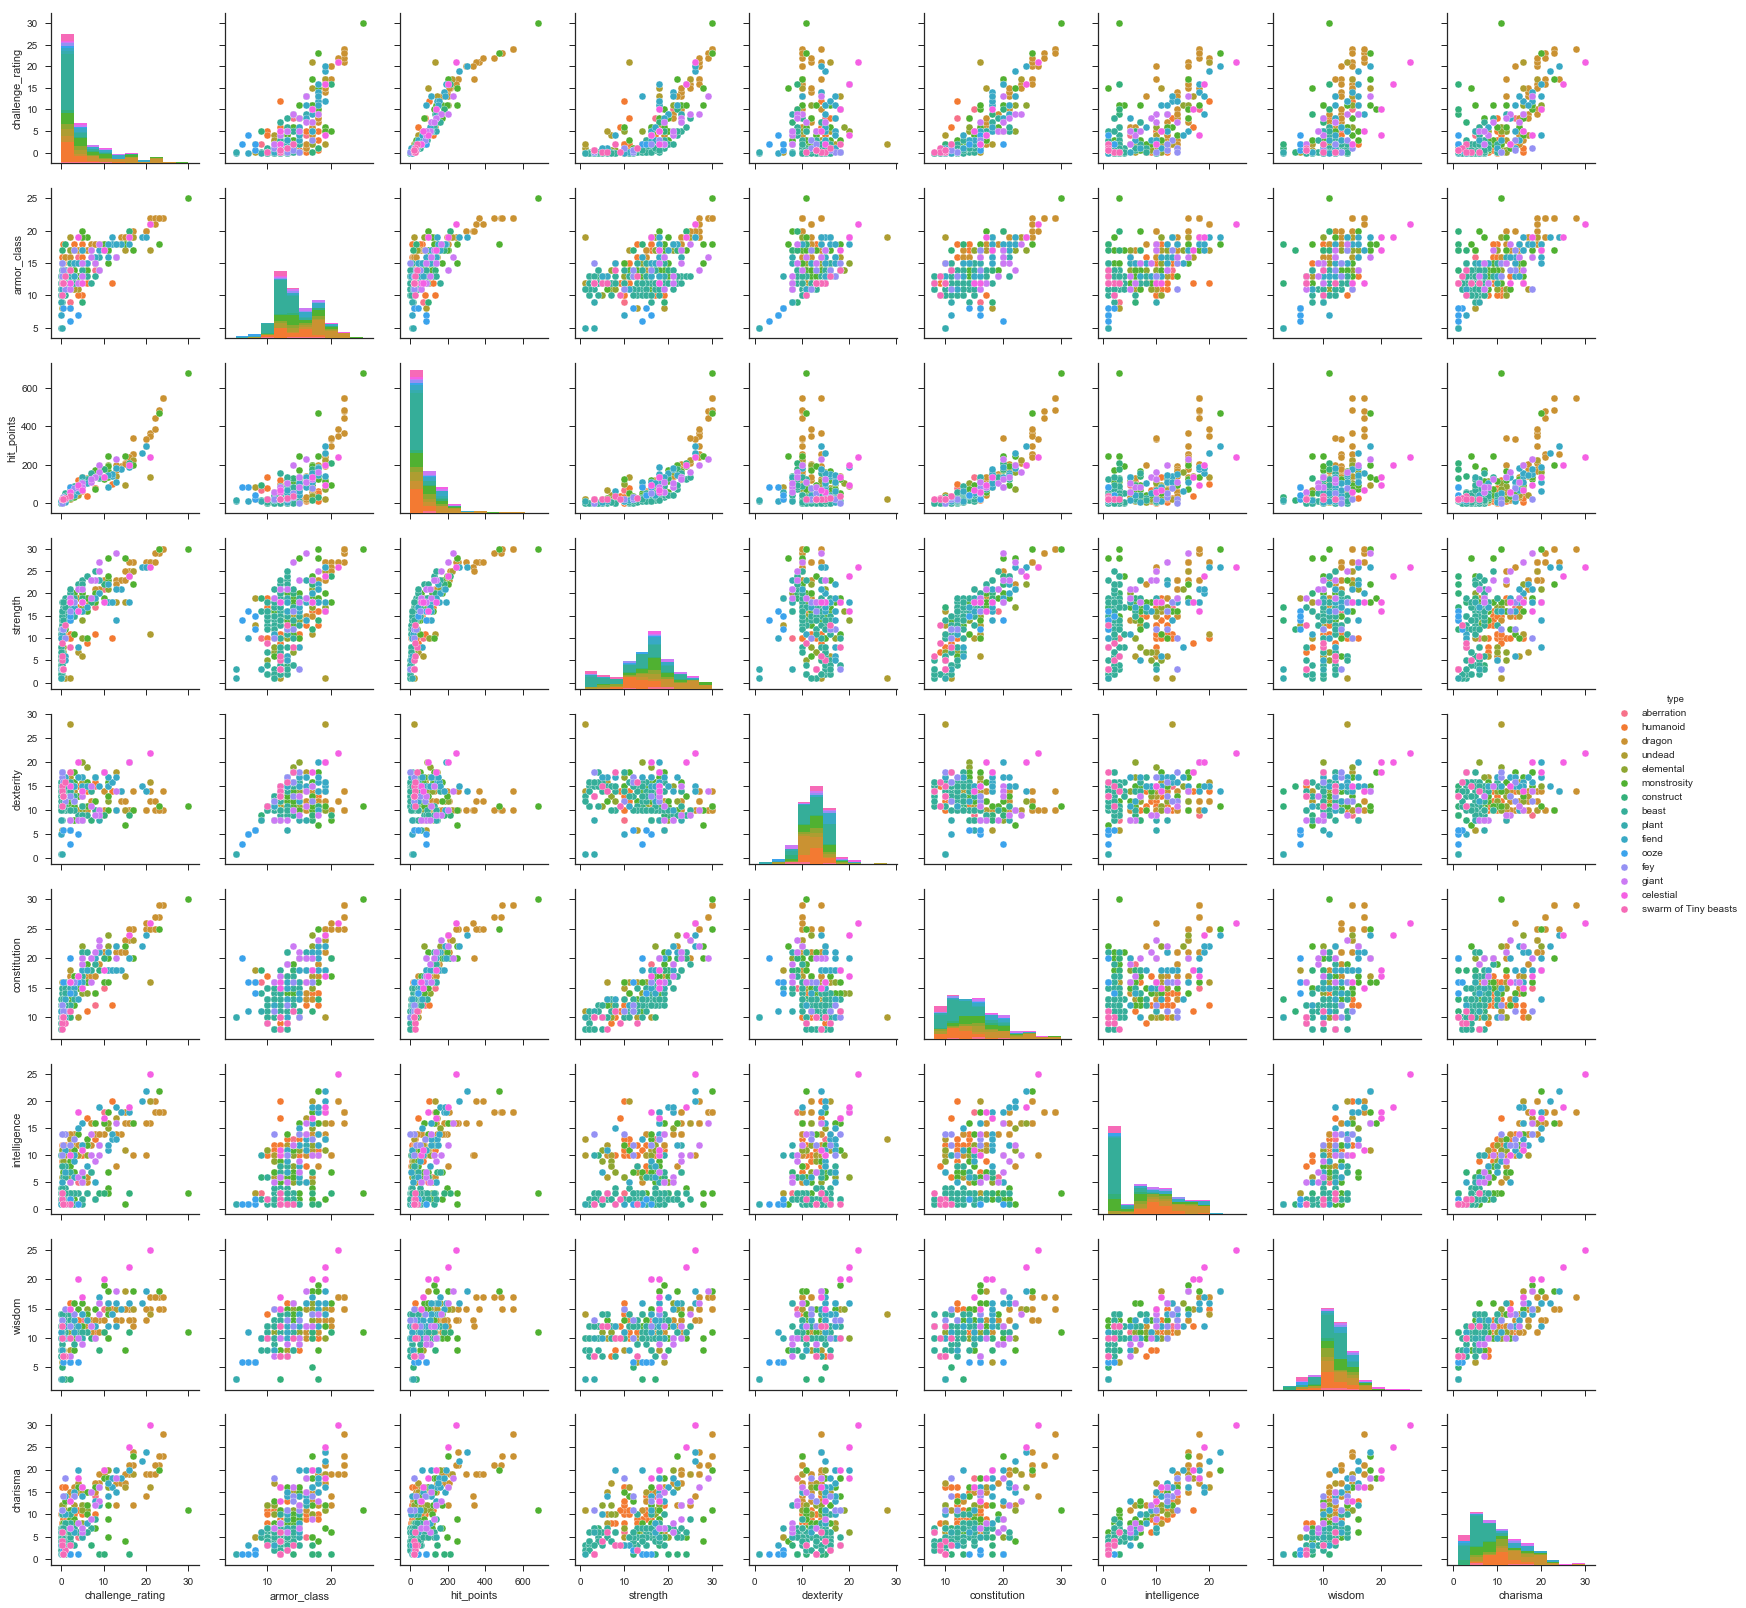

In [6]:
sns.set(style="ticks")
view = monster_df[['challenge_rating', 'armor_class', 'hit_points', 'type', 
                   'strength', 'dexterity', 'constitution',
                   'intelligence','wisdom', 'charisma']]
sns.pairplot(view, hue='type')

In [7]:
df = pd.DataFrame.copy(monster_df)
df.challenge_rating= df.challenge_rating.astype('category')

# Due to a bug in matplotlib, plotnine doesn't handle categoricals with one datapoint gracefully
counts = df.challenge_rating.groupby(df.challenge_rating).count().rename('count')
singletons = [x for x in counts.index[counts == 1]]
a = df[df.challenge_rating.apply(lambda x: x not in singletons)]
b = df[df.challenge_rating.apply(lambda x: x in singletons)]

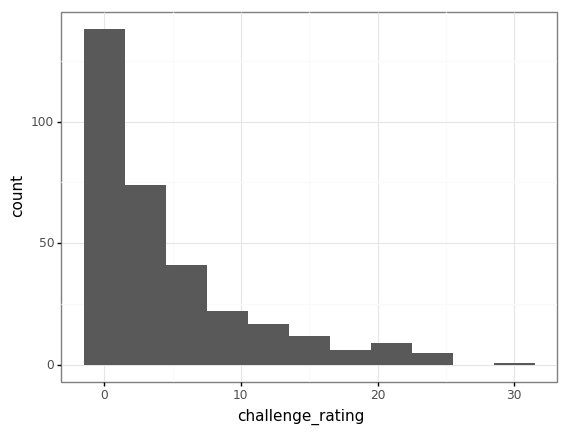

<ggplot: (273710677)>

In [8]:
ggplot(monster_df, aes(x='challenge_rating')) \
    + geom_histogram(stat=stat_bin(binwidth=3)) \
    + theme_bw()

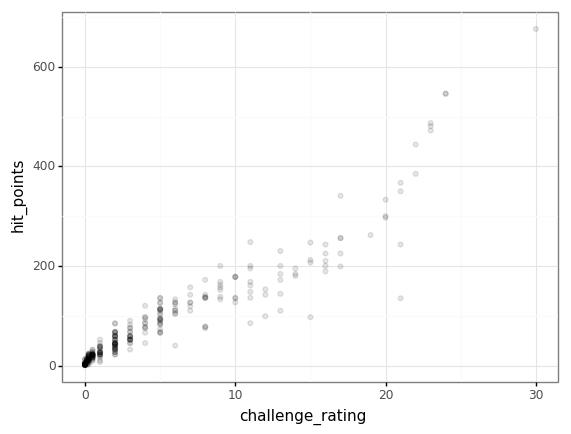

<ggplot: (287045815)>

In [9]:
ggplot(monster_df, aes(x='challenge_rating', y='hit_points')) \
    + geom_point(alpha=0.1) \
    + theme_bw()

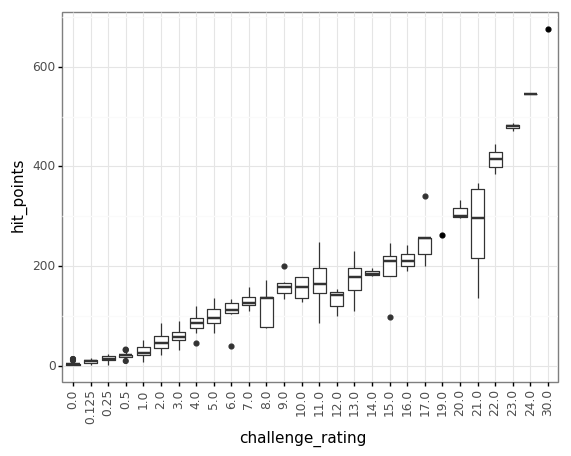

<ggplot: (-9223372036570831963)>

In [10]:
ggplot(a, aes(x='challenge_rating', y='hit_points')) \
    + geom_boxplot() \
    + geom_point(b, aes(x='challenge_rating', y='hit_points')) \
    + theme_bw() \
    + theme(axis_text_x=element_text(angle=90))

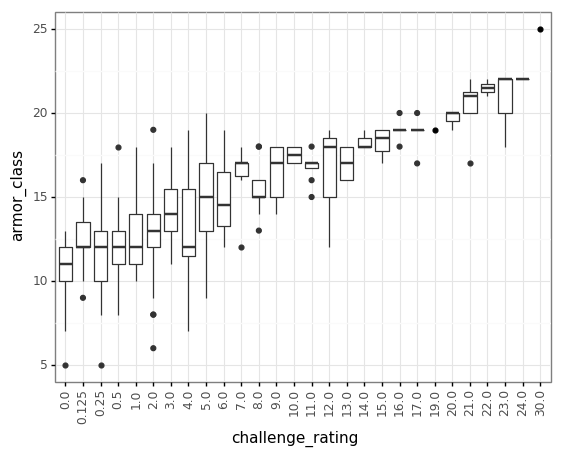

<ggplot: (274662790)>

In [11]:
ggplot(a, aes(x='challenge_rating', y='armor_class')) \
    + geom_boxplot() \
    + geom_point(b, aes(x='challenge_rating', y='armor_class')) \
    + theme_bw() \
    + theme(axis_text_x=element_text(angle=90))

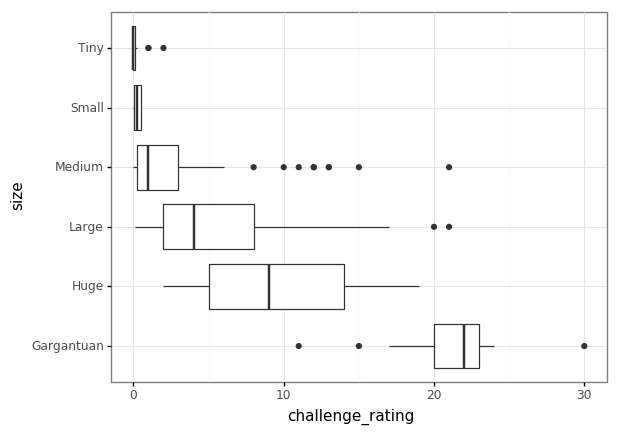

<ggplot: (289412360)>

In [12]:
ggplot(monster_df, aes(x='size', y='challenge_rating')) \
    + geom_boxplot() \
    + theme_bw() \
    + coord_flip()

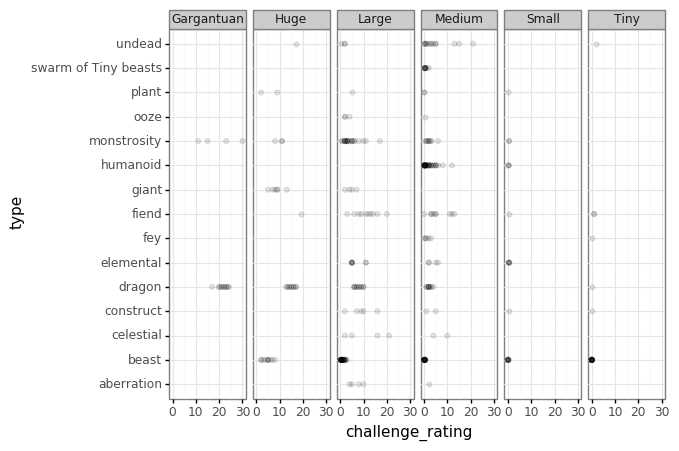

<ggplot: (-9223372036569576974)>

In [13]:
ggplot(monster_df, aes(x='type', y='challenge_rating')) \
    + geom_point(alpha=0.1) \
    + theme_bw() \
    + coord_flip() \
    + facet_grid('. ~ size')

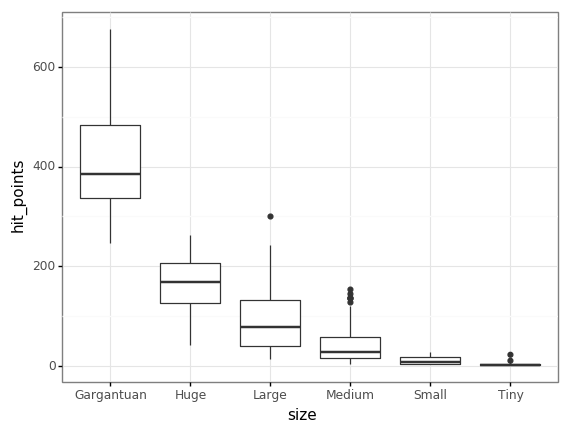

<ggplot: (285446415)>

In [14]:
ggplot(df, aes(x='size', y='hit_points')) \
    + geom_boxplot() \
    + theme_bw()